## NLP with DL

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_pickle('clean_train.pkl')

In [3]:
df.head()

,id,text,target,cleaned_text,lemmas,lemmas_small
0,1,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason this earthquake may a...,"[deed, reason, earthquake, allah, forgive]","[deed, reason, earthquake, forgive]"
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near ronge sask canada,"[forest, near, ronge, sask, canada]","[forest, near, canada]"
2,5,All residents asked to 'shelter in place' are ...,1,all residents asked shelter place are being no...,"[resident, ask, shelter, place, notify, office...","[resident, ask, shelter, place, notify, office..."
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,"[people, receive, wildfire, evacuation, order,...","[people, receive, wildfire, evacuation, order]"
4,7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska smok...,"[just, send, photo, ruby, alaska, smoke, wildf...","[just, send, photo, ruby, smoke, wildfire, pou..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            7613 non-null   int64 
 1   text          7613 non-null   object
 2   target        7613 non-null   int64 
 3   cleaned_text  7613 non-null   object
 4   lemmas        7613 non-null   object
 5   lemmas_small  7613 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


## Tokenization

In [5]:
X = df.cleaned_text
y = df.target

In [6]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [7]:
tokenizer.fit_on_texts(X)

## Creating word index

In [8]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'for': 3,
 'you': 4,
 'not': 5,
 'with': 6,
 'that': 7,
 'this': 8,
 'from': 9,
 'are': 10,
 'was': 11,
 'have': 12,
 'like': 13,
 'just': 14,
 'but': 15,
 'your': 16,
 'amp': 17,
 'its': 18,
 'out': 19,
 'has': 20,
 'after': 21,
 'all': 22,
 'will': 23,
 'fire': 24,
 'when': 25,
 'get': 26,
 'new': 27,
 'now': 28,
 'via': 29,
 'more': 30,
 'about': 31,
 'news': 32,
 'what': 33,
 'people': 34,
 'one': 35,
 'they': 36,
 'how': 37,
 'been': 38,
 'over': 39,
 'who': 40,
 'into': 41,
 'were': 42,
 'video': 43,
 'can': 44,
 'emergency': 45,
 'disaster': 46,
 'there': 47,
 'police': 48,
 'than': 49,
 'would': 50,
 'her': 51,
 'some': 52,
 'still': 53,
 'his': 54,
 'body': 55,
 'burning': 56,
 'crash': 57,
 'back': 58,
 'california': 59,
 'storm': 60,
 'suicide': 61,
 'why': 62,
 'got': 63,
 'them': 64,
 'off': 65,
 'had': 66,
 'time': 67,
 'know': 68,
 'man': 69,
 'buildings': 70,
 'day': 71,
 'first': 72,
 'see': 73,
 'did': 74,
 'going': 75,
 'world': 76,
 'bomb': 77

In [9]:
len(tokenizer.word_index)

16226

## Converting tokens to numeric

In [10]:
X_num_tokens = tokenizer.texts_to_sequences(X)

## Maximum number of tokens for all documents

In [11]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [12]:
num_tokens

array([11,  6, 16, ...,  2, 16, 10])

In [13]:
num_tokens.mean()

10.999474582950217

In [14]:
num_tokens.max()

25

In [16]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

1540

In [15]:
max_tokens = 25

In [19]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9998686457375542

In [16]:
sum(num_tokens < max_tokens)

7612

In [17]:
len(num_tokens)

7613

## Fixing token counts of all documents (pad_sequences)

In [18]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [19]:
X_pad.shape

(7613, 25)

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, stratify=y, test_size=0.2, random_state=0) 

## Modelling

In [33]:
model = Sequential()

In [22]:
embedding_size = 200

In [133]:
# pip install -U numpy==1.19.5

In [34]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

model.add(Dropout(0.3))

model.add(GRU(units=64, return_sequences=True))
model.add(Dropout(0.3))

model.add(GRU(units=32, return_sequences=True))
model.add(Dropout(0.3))

model.add(GRU(units=16))

model.add(Dense(1, activation='sigmoid'))

In [35]:
optimizer = Adam(learning_rate=0.002)

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Accuracy'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_Accuracy", mode="max", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [138]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([1.16354605, 0.8767636 ])

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [38]:
model.fit(X_train, y_train, epochs=20, batch_size=32,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/20
191/191 [==============================] - 37s 151ms/step - loss: 0.5221 - Accuracy: 0.7378 - val_loss: 0.4366 - val_Accuracy: 0.8076
Epoch 2/20
191/191 [==============================] - 26s 138ms/step - loss: 0.2838 - Accuracy: 0.8905 - val_loss: 0.4944 - val_Accuracy: 0.7807
Epoch 3/20
191/191 [==============================] - 26s 138ms/step - loss: 0.1517 - Accuracy: 0.9496 - val_loss: 0.6522 - val_Accuracy: 0.7741
Epoch 4/20
191/191 [==============================] - 26s 135ms/step - loss: 0.1006 - Accuracy: 0.9693 - val_loss: 0.6600 - val_Accuracy: 0.7689
Epoch 4: early stopping


## Model evaluation

In [39]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.522057,0.737767,0.436587,0.807617
1,0.283763,0.890476,0.494414,0.780696
2,0.151712,0.949589,0.652247,0.774130
3,0.100569,0.969294,0.660018,0.768877


<AxesSubplot:>

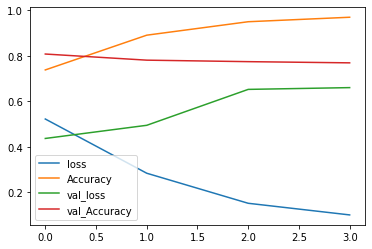

In [40]:
model_loss.plot()

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score


y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

191/191 [==============================] - 5s 16ms/step
[[3361  112]
 [ 514 2103]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      3473
           1       0.95      0.80      0.87      2617

    accuracy                           0.90      6090
   macro avg       0.91      0.89      0.89      6090
weighted avg       0.90      0.90      0.90      6090



In [42]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

48/48 [==============================] - 1s 14ms/step
[[785  84]
 [209 445]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       869
           1       0.84      0.68      0.75       654

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



48/48 [==============================] - 1s 11ms/step


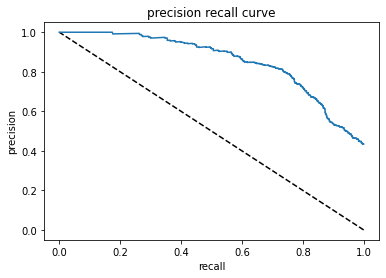

In [144]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [145]:
average_precision_score(y_test, y_pred_proba)

0.853484338494844

In [43]:
df_test = pd.read_pickle('clean_test.pkl')

In [44]:
X_num_tokens_test = tokenizer.texts_to_sequences(df_test.cleaned_text)
# Fixing token cpounts of all docuemnts(pad_seq)
X_pad_test = pad_sequences(X_num_tokens_test, maxlen=25)

In [45]:
df_test['target'] = model.predict(X_pad_test)
df_test['target'] = df_test.target.apply(lambda x : 1 if x > 0.5 else 0)
df_test = df_test[['id','target']]

102/102 [==============================] - 1s 14ms/step


In [46]:
df_test.to_csv('submission10.csv', index=False)